# Άσκηση 2.1: SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Ερώτημα (α)

Αρχικά, σχεδιάζουμε σε γράφημα τα σημεία εισόδου και παρατηρούμε ότι δεν είναι γραμμικά διαχωρίσιμα. Για τον λόγο αυτό, μετατρέπουμε τα διανύσματα $\tilde{x}_n$ σε έναν χώρο υψηλότερων διαστάσεων, $y_n = ϕ(\tilde{x}_n)$, χρησιμοποιώντας την εξής μορφή ϕ-functions 2ης τάξης: 
$$ϕ(x_1, x_2) = \Big[1 \;\; \tilde{y}\Big] = \Big[1\;\; x_1\;\; x_2\;\; \frac{x_1^2+x_2^2-5}{3}\Big]^T$$

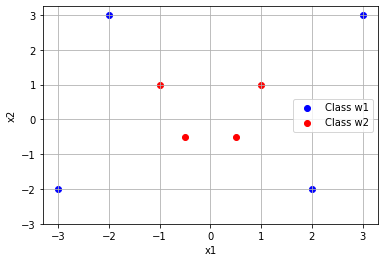

In [ ]:
# Plot Points of two Classes
W1 = [(3,3),(2,-2),(-3,-2),(-2,3)]          # w1 class
W2 = [(1,1),(0.5,-0.5),(-0.5,-0.5),(-1,1)]  # w2 class

def coords(data):
    xs, ys = [], []
    for point in data:
        xs.append(point[0])
        ys.append(point[1])
    return xs, ys

W1_x, W1_y = coords(W1)
plt.figure()
plt.grid()
plt.scatter(W1_x, W1_y, color='b', label = 'Class w1')

W2_x, W2_y = coords(W2)
plt.scatter(W2_x, W2_y, color='r', label = 'Class w2')

N = 3
plt.xticks(np.arange(-N, N+1, 1))
plt.yticks(np.arange(-N, N+1, 1))
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
# Map to Higher Dimensionality
def fi_function(x):
  return [1, x[0], x[1], ((x[0])**2 + (x[1])**2 - 5)/3]

new_w1 = []
new_w2 = []
print('W1 Class')
for sample in W1:
  new_w1.append(np.array(fi_function(sample)))
  print(fi_function(sample))

print('\nW2 Class')
for sample in W2:
  new_w2.append(np.array(fi_function(sample)))
  print(fi_function(sample))

W1 Class
[1, 3, 3, 4.333333333333333]
[1, 2, -2, 1.0]
[1, -3, -2, 2.6666666666666665]
[1, -2, 3, 2.6666666666666665]

W2 Class
[1, 1, 1, -1.0]
[1, 0.5, -0.5, -1.5]
[1, -0.5, -0.5, -1.5]
[1, -1, 1, -1.0]


## Ερώτημα (β)

Ακολούθως, με βάση το υποκεφάλαιο 5.11.1  [2], [5, SVM] προβαίνουμε στη μεγιστοποίηση του παρακάτω συναρτησιακού:

$$L({\alpha}) = \sum_{k=1}^{N}\alpha_i - \frac{1}{2}\sum_{k,j}^{N}\alpha_k\alpha_jz_kz_j\mathbf{y}_j^t\mathbf{y}_k$$

υπό τους περιοσισμούς:

$$\sum_{k=1}^{N}z_k\alpha_k = 0 \qquad \text{και} \qquad \alpha_k \geq 0, k = 1,\dots,N$$

In [ ]:
# Collec all samples in the new dimensional space
y = new_w1 + new_w2
z = [-1 for i in range(len(new_w1))] + [1 for i in range(len(new_w2))]

In [ ]:
def L(a): # Cost Function
  result = 0
  for i in range(len(z)):
    result += a[i]
  
  for i in range(len(z)):
    for j in range(len(z)):
      result -= 0.5*a[i]*a[j]*z[i]*z[j]*np.dot(y[i],y[j])
  
  return -result

In [ ]:
# Constrains on a_i
cons = ({'type': 'eq', 'fun': lambda a:  np.dot(z,a)},
        {'type': 'ineq', 'fun': lambda a: a[0]},
        {'type': 'ineq', 'fun': lambda a: a[1]},
        {'type': 'ineq', 'fun': lambda a: a[2]},
        {'type': 'ineq', 'fun': lambda a: a[3]},
        {'type': 'ineq', 'fun': lambda a: a[4]},
        {'type': 'ineq', 'fun': lambda a: a[5]},
        {'type': 'ineq', 'fun': lambda a: a[6]},
        {'type': 'ineq', 'fun': lambda a: a[7]}
        )

In [ ]:
res = minimize(L, (0,0,0,0,0,0,0,0),
               constraints=cons)

In [ ]:
res

     fun: -0.2469135792544758
     jac: array([ 1.22247892,  0.11110054,  1.22219016,  0.11125482, -0.11112959,
       -0.11106048, -0.11104704, -0.11110269])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-1.05270438e-17,  1.53551012e-01, -3.44416410e-16,  9.33680919e-02,
        1.66516910e-01,  1.69953160e-02,  1.74894126e-02,  4.59174647e-02])

In [ ]:
# Optimal a_i
a_opt = np.round(res.x,4)
print(a_opt) # a_i >= 0 for each i 

[-0.      0.1536 -0.      0.0934  0.1665  0.017   0.0175  0.0459]


In [ ]:
0 == np.round(np.dot(z, a_opt),3) # constraints satisfied

True

Παρατηρούμε ότι ικανοποιούνται οι περιορισμοί του προβλήματος βελιστοποίησης.

## Ερώτημα (γ)

Το ζητούμενο διάνυσμα βαρών δίνεται από τη σχέση: $$\tilde{w} = \sum_{i=1}^{N}a_iz_i\tilde{y_i}$$

In [ ]:
weights = []
for j in range(1,len(y[1])):
  w = 0
  for i in range(len(z)):
      w += a_opt[i] * z[i] * y[i][j]
  weights.append(w)

In [ ]:
print(weights)

[-4.999999999997368e-05, 0.22214999999999996, -0.6668166666666666]


Ακολούθως, προσδιορίζουμε το bias $w_0$ χρησιμοποιώντας το support vector $y_2$ (για το οποίο ισχύει $α_2 > 0$) στην ακόλουθη σχέση:
$$z_{2}(\tilde{w}\cdot \tilde{y_{2}} + w_0) - 1 = 0$$
από την οποία προκύπτει:
$$w_0 = \frac{1}{z_{2}}-\tilde{w}\cdot \tilde{y}_{2}$$


In [ ]:
w0 = (1/z[1]) - np.dot(weights, y[1][1:]) # sample y2 is a Support Vector since a2 > 0

In [ ]:
# Total Weight Vector with bias
weights = [w0] + weights
print(weights)

[0.11121666666666652, -4.999999999997368e-05, 0.22214999999999996, -0.6668166666666666]


Έπειτα, για το διάνυσμα w που βρήκαμε, ελέγχουμε ότι ισχύουν οι προϋποθέσεις $z_n\mathbf{w}^{T}\mathbf{y}_n \geq 1 \;\;\; (n=1,\dots,N)$:

In [ ]:
for i in range(len(z)):
  print(z[i]*np.dot(weights, y[i])>=1)

True
True
True
True
True
True
True
True


## Ερώτημα (δ)

Το margin $\beta$ δίνεται από τον τύπο: $\beta = \frac{1}{|\tilde{w}|}$

In [ ]:
b = 1/(np.linalg.norm(weights[1:]))
print('Margin b =', b)

Margin b = 1.4227830509919526


## Ερώτημα (ε)

Βρίσκουμε τη συνάρτηση διαχωρισμού $g(x_1,x_2) = \mathbf{w}^Τ\phi(x_1,x_2)$ στον αρχικό χώρο $x_1-x_2$ και σχεδιάζουμε την καμπύλη $g(x_1,x_2)=0$ μαζί με τα 8 αρχικά σημεία.

In [ ]:
x1 = np.linspace(-4, 4, 500)
x2 = np.linspace(-4, 4, 500)
X, Y = np.meshgrid(x1, x2)
g = weights[0] + weights[1]*X + weights[2]*Y + weights[3]*(X**2+Y**2-5)/3

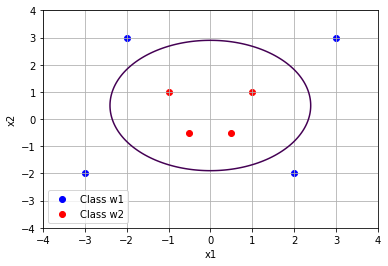

In [ ]:
plt.figure()
plt.grid()
plt.scatter(W1_x, W1_y, color='b', label = 'Class w1')
plt.scatter(W2_x, W2_y, color='r', label = 'Class w2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.contour(X, Y, g, levels=[0])
plt.legend()
plt.show()

## Ερώτημα (στ)

Τα Support Vectors είναι τα σημεία με συντελεστή Lagrange αυστηρώς θετικό ($α_i > 0$), δηλαδή όλα εκτός από τα $x_1$ και $x_3$.

In [ ]:
for i in range(len(y)):
  if (a_opt[i]>0):
    print('Sample y'+str(i+1)+' is a Support Vector, since a'+str(i+1)+' = '+str(a_opt[i])+' > 0')
  else:
    print('Sample y'+str(i+1)+' is NOT a Support Vector, since a'+str(i+1)+' = 0')

Sample y1 is NOT a Support Vector, since a1 = 0
Sample y2 is a Support Vector, since a2 = 0.1536 > 0
Sample y3 is NOT a Support Vector, since a3 = 0
Sample y4 is a Support Vector, since a4 = 0.0934 > 0
Sample y5 is a Support Vector, since a5 = 0.1665 > 0
Sample y6 is a Support Vector, since a6 = 0.017 > 0
Sample y7 is a Support Vector, since a7 = 0.0175 > 0
Sample y8 is a Support Vector, since a8 = 0.0459 > 0


## Ερώτημα (ζ)

In [ ]:
new_samples = [(np.sqrt(2), np.sqrt(2)), (-2, 3)]

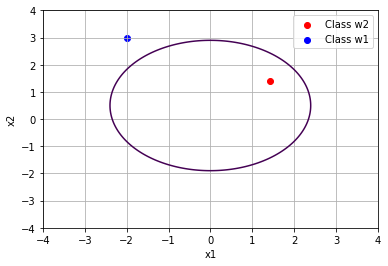

In [ ]:
plt.figure()
plt.grid()
plt.scatter(new_samples[0][0], new_samples[0][1], color='r', label = 'Class w2')
plt.scatter(new_samples[1][0], new_samples[1][1], color='b', label = 'Class w1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.contour(X, Y, g, levels=[0])
plt.legend()
plt.show()

In [ ]:
print(np.dot(weights, fi_function(new_samples[0]))) # > 0 --> Class w2
print(np.dot(weights, fi_function(new_samples[1]))) # < 0 --> Class w1

0.6475857210919529
-1.0004111111111111


Συνεπώς, ο SVM Classifier ταξινομεί το $\Big(\sqrt{2} \;\; \sqrt{2}\Big)^T$ στην κλάση $\omega_2$ και το $\Big(-2 \;\; 3\Big)^T$ στην κλάση $\omega_1$.